In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement 
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date).first().date
print(recent_date)

2010-01-01


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
print(recent_date)

2017-08-23


In [11]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)

2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores

pre_scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > one_year).\
    order_by(measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
pre_scores_df = pd.DataFrame(pre_scores)
pre_scores_df.set_index('date')
pre_scores_df.head()

# Sort the dataframe by date

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


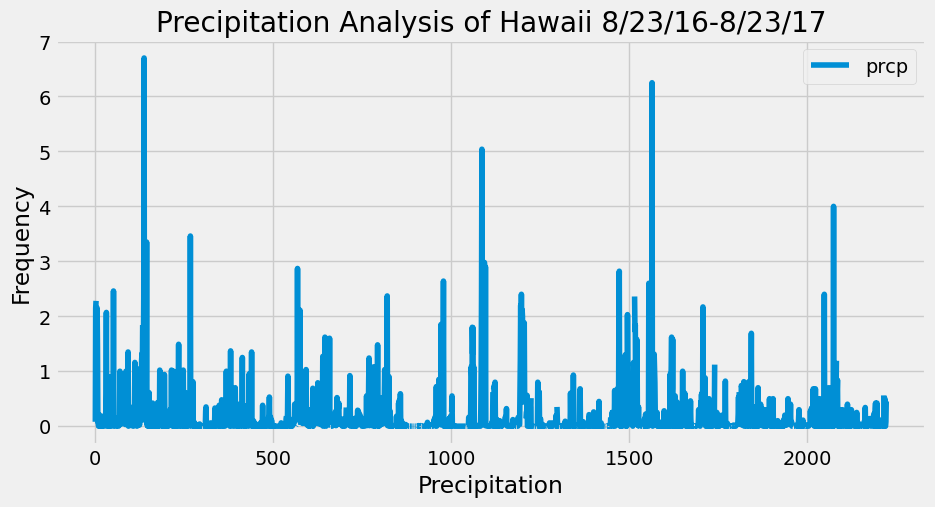

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = pre_scores_df.plot(figsize=(10,5))
ax.set_ylabel("Frequency")
ax.set_xlabel("Precipitation")
ax.set_title("Precipitation Analysis of Hawaii 8/23/16-8/23/17")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pre_scores_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement).group_by(measurement.station).count()

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

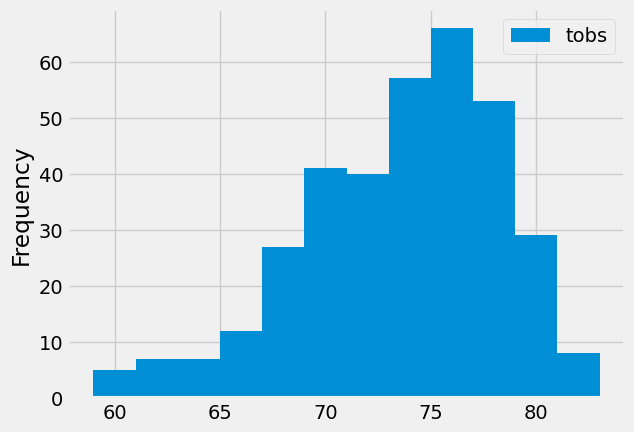

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months = session.query(measurement.tobs).filter(measurement.station == "USC00519281").\
    filter(measurement.date >= one_year).all()
twelve_months_df = pd.DataFrame(twelve_months, columns = ["tobs"])
twelve_months_df.plot.hist(bins = 12)
plt.show()

# Close session

In [21]:
# Close session
session.close()